In [12]:
##############################################
# Manually construct behaviors               #
##############################################

# Packages
import pickle
import numpy as np
import time
import rospy
import rospkg
from corrective_shared_autonomy.TaskModels.DMPLWRhardcoded import HybridSegment
from corrective_shared_autonomy.TaskModels.DMPLWRhardcoded import DMPLWRhardcoded
from corrective_shared_autonomy.TaskModels.FragmentedExecution import interpMultD
from core_robotics.dataviz import threedplot, highlightedthreedplot
from core_robotics.PyBSpline import BSplineSurface
from scipy.spatial.transform import Rotation as ScipyR
from scipy.spatial.transform import Slerp
import matplotlib.pyplot as plt

rospy.init_node('subdivisiontester', anonymous=True)

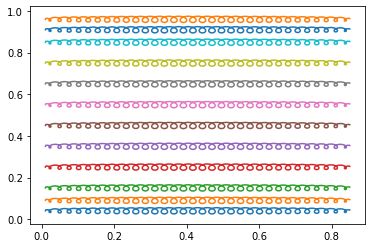

In [14]:
###################################################
# Red Overhead bin: IRC_piece1 ####################
###################################################

rospack = rospkg.RosPack()
uliconfigpath = rospack.get_path('uli_config')
config_dir = rospack.get_path('uli_config')+'/registration_models/'

outfile  = config_dir + 'IRC_piece1_frag.pkl'

ang_relative_to_surface = 0 # degree

tool_offset = np.array([-0.04, 0.0, 0.0])
state_names = ['u','v','f','theta_qx','theta_qy','theta_qz','theta_qw','delta_s','valve','tool_offset_x','tool_offset_y','tool_offset_z']
starting = [[0.01, 0.04], [0.01, 0.09], [0.01, 0.15], [0.01, 0.25], [0.01, 0.35], [0.01, 0.45], [0.01, 0.55], [0.01, 0.65], [0.01, 0.75], [0.01, 0.85], [0.01, 0.91], [0.01, 0.96]]
ending = [[0.85, 0.04], [0.85, 0.09], [0.85, 0.15], [0.85, 0.25], [0.85, 0.35], [0.85, 0.45], [0.85, 0.55], [0.85, 0.65], [0.85, 0.75], [0.85, 0.85], [0.85, 0.91], [0.85, 0.96]]
# ending = [[0.01, 0.99], [0.15, 0.99], [0.25, 0.99], [0.35, 0.99], [0.45, 0.99], [0.55, 0.99], [0.65, 0.99], [0.75, 0.99], [0.85, 0.99], [0.95, 0.99]]
# starting = [[0.05, 0.01],[0.2,0.01], [0.35, 0.01],[0.5, 0.01],[0.65,0.01],[0.80,0.01],[0.95,0.01]]
# ending = [[0.05, 0.99],[0.2,0.99], [0.35, 0.99],[0.5, 0.99],[0.65,0.99],[0.80,0.99],[0.95,0.99]]
samps_per_sec = 40
# samps = samps_per_sec * np.array([10,10,10,10,10])
samps = samps_per_sec * np.array([80,80,80,80,80,80,80,80,80,80,80,80])
forces = np.array([-20.,-20.,-20.,-20.,-20.,-20.,-20.,-20.,-20.,-20.,-20, -20])
angs = np.array([-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10])

state_vals = []
for ii in range(0,len(starting)):
    R_tool_surf = ScipyR.from_euler('zy',[ang_relative_to_surface,angs[ii]],degrees=True)
    theta_q = R_tool_surf.as_quat()
    start_temp = np.array([starting[ii][0],starting[ii][1],forces[ii],theta_q[0],theta_q[1],theta_q[2],theta_q[3], 1.0, 1.0, tool_offset[0], tool_offset[1], tool_offset[2]])
    end_temp = np.array([ending[ii][0],ending[ii][1],forces[ii],theta_q[0],theta_q[1],theta_q[2],theta_q[3], 1.0, 1.0, tool_offset[0], tool_offset[1], tool_offset[2]])
#     state_vals.append(interpMultD(start_temp,end_temp,samps[ii],quat_vars=[3]))
    state_vals.append(interpMultD(start_temp,end_temp,samps[ii],quat_vars=[3],super_pos_vars=[0], super_pos_freq=[0.04], super_pos_amp=[0.015]))

# Plot 2D passes
for ii in range(0,len(starting)):
    plt.plot(state_vals[ii][0,:],state_vals[ii][1,:])
plt.show()
    
R_extra_tool = ScipyR.from_euler('y',-5,degrees=True)
q_extra = R_extra_tool.as_quat()
corrections = [[0.0, 0.0, -6.0, q_extra[0], q_extra[1], q_extra[2], q_extra[3], -0.5, 0.0, -0.01, 0.0, 0.0]]

pickle.dump((state_names,state_vals,corrections),open(outfile,"wb"), protocol=2)